# TTim: compute per log time interval

Import packages

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
from scipy.special import exp1

use_fork = True
if use_fork:
    sys.path.insert(1, "../..")
import ttim

# check which ttim
print("ttim:", ttim.__file__)

ttim: /Users/mark/git/ttim/docs/03examples/../../ttim/__init__.py


Model parameters

In [6]:
T = 500
S = 1e-3
t = np.logspace(-5, 0, 11)
rw = 0.3
hwell = -2
tmin = 0.1
tmax = 10

ml = ttim.ModelMaq(kaq=25, z=[20, 0], Saq=S / 20, tmin=tmin, tmax=tmax)
w = ttim.HeadWell(ml, tsandh=[(0, hwell)], rw=rw)
ml.solve()

self.neq  1


TypeError: HeadEquation.equation() takes 1 positional argument but 2 were given

In [6]:
h = np.full_like(t, np.nan)
for i, ti in enumerate(t[:-1]):
    h[i] = ml.head(30, 0, ti).item()  # .item() to get scalar value

The TTim solution still matches the analytical Theis solution. 

Note that the final time could not be computed yet because the new implementation does not expand the time last time interval to contain `t=1.0`.

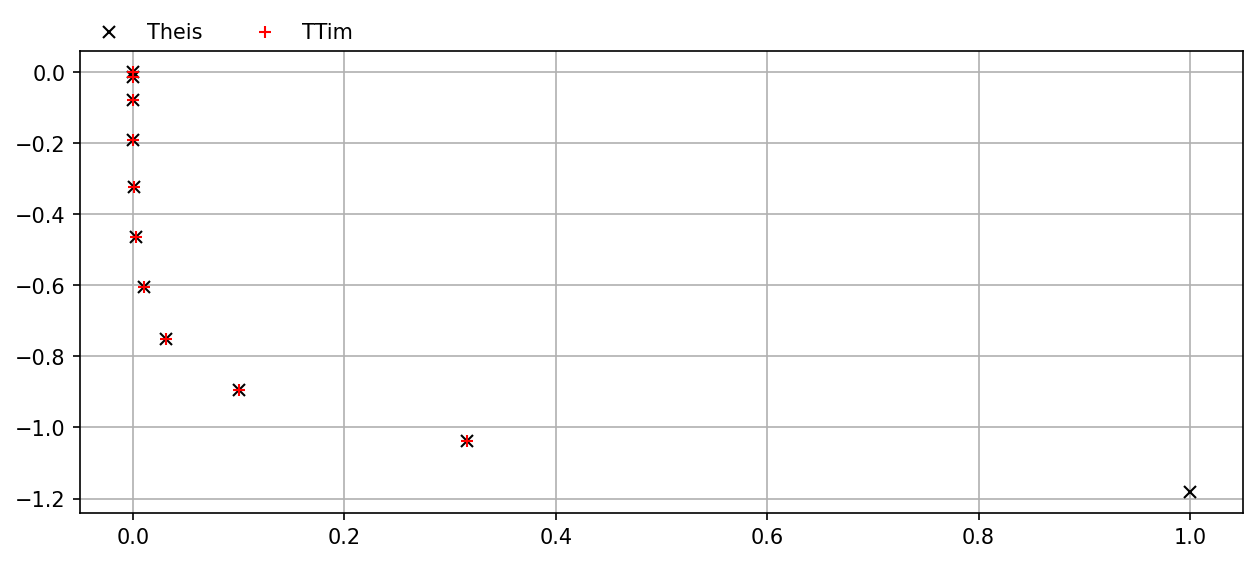

In [7]:
plt.subplots(1, 1, figsize=(10, 4), dpi=150)
plt.plot(t, htheis, "x", c="k", label="Theis")
plt.plot(t, h, "+", c="r", label="TTim")
plt.legend(loc=(0, 1), frameon=False, ncol=2)
plt.grid()

But this allows us to demonstrate a new feature. We can solve for a specific time interval using `ml.solve_interval()`. 

In [8]:
# solve interval
ml.solve_interval(0)
# compute head at time
h[-1] = ml.head(30, 0, t[-1]).item() # .item() not strictly needed here

Plot figure again.

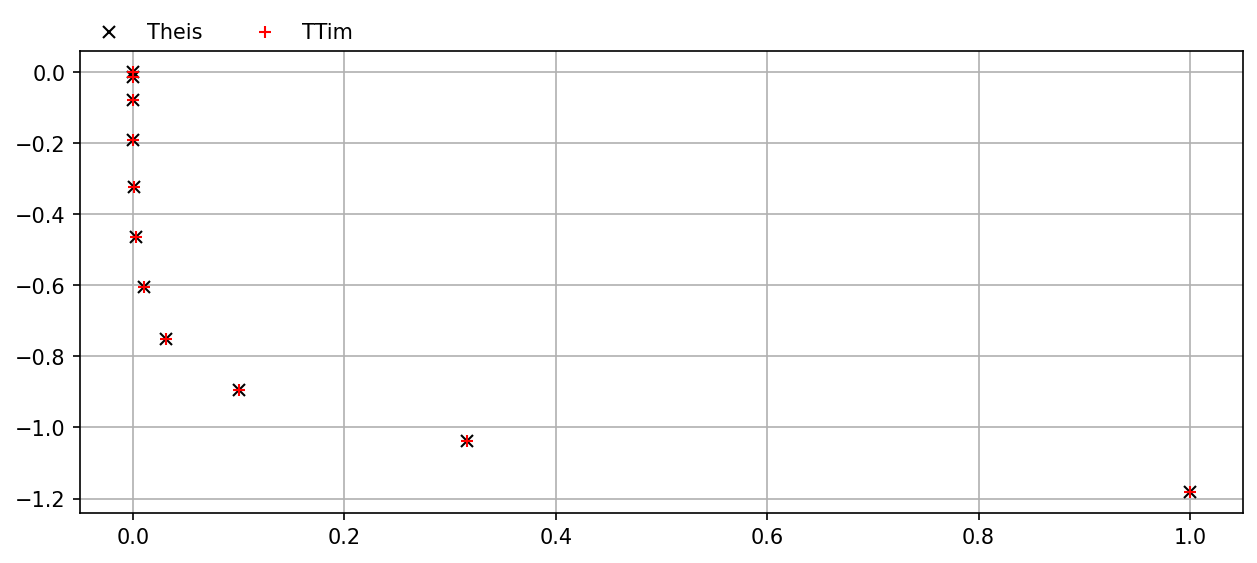

In [9]:
plt.subplots(1, 1, figsize=(10, 4), dpi=150)
plt.plot(t, htheis, "x", c="k", label="Theis")
plt.plot(t, h, "+", c="r", label="TTim")
plt.legend(loc=(0, 1), frameon=False, ncol=2)
plt.grid()

The differences:

In [10]:
h - htheis

array([ 6.37189134e-09, -2.42570941e-10, -7.62565022e-08, -3.67057912e-10,
       -8.43733611e-07, -1.44393814e-09,  2.36600560e-07, -2.87300783e-09,
        2.00696027e-06, -3.10441273e-09,  3.31500919e-06])

### Hantush

In [11]:
# Hantush solution from Bakker and Post
from scipy.integrate import quad

def integrand(tau, r, T, lab):
    return 1 / tau * np.exp(-tau - r ** 2 / (4 * lab ** 2 * tau))

def hantush(r, t, T, S, c, Q):
    lab = np.sqrt(T * c)
    u = S * r ** 2 / (4 * T * t)
    F = quad(integrand, u, np.inf, args=(r, T, lab))[0]
    return -Q / (4 * np.pi * T) * F

hantushvec = np.vectorize(hantush) # vectorized version of hantush function

In [12]:
T = 500  # transmissivity
S = 1e-4
time = np.logspace(-2, 2, 101)
r = 20
Q = 1000
c = 1e3

ml = ttim.ModelMaq(
        kaq=25, z=[21, 20, 0], c=c, Saq=S / 20, topboundary="semi", tmin=0.01, tmax=1000
    )
w = ttim.Well(ml, tsandQ=[(0, Q)], rw=1e-5)
ml.solve()
ml.head(r, 0, 10)
hhantush = np.zeros(len(time))
hantushexact = np.zeros(len(time))
for i, t in enumerate(time):
    hhantush[i] = ml.head(r, 0, t)[0]
    hantushexact[i] = hantush(r, t, T, S, c, Q)

self.neq  1
solution complete


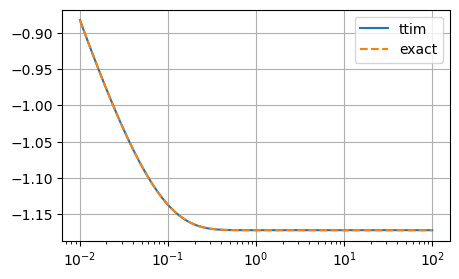

In [13]:
plt.figure(figsize=(5, 3))
plt.semilogx(time, hhantush, label='ttim')
plt.semilogx(time, hantushexact, '--', label='exact')
plt.legend()
plt.grid()

### Multi-layers

In [14]:
k = 25
H = 20
Ss = 1e-4 / H
t = np.logspace(-3, 1, 100)
Q = 500
rw = 0.2
#ml = ttim.ModelMaq(kaq=k, z=[H, 0], tmin=1e-3, tmax=10)
ml = ttim.Model3D(kaq=k, z=np.linspace(H, 0, 3), Saq=Ss, tmin=1e-3, tmax=10, M=1)
w = ttim.Well(ml, tsandQ=[(0, Q)], rw=rw, layers=[0, 1])

ml.solve()

self.neq  2
solution complete


In [15]:
ml.head(rw, 0, 2) # wrong answer

array([[0.09780917],
       [0.00507222]])